# Looking at sound and laser data on different power scales for pulsed laser

We have taken more samples where we sampled the sound created from the metal plate ablation using a scaling power from 14 $J$ (joules) to 19 $J$ for for N = 100 samples.

We'll start by importing our necessary packages, and giving the path to our data files.

In [1]:
import numpy as np
import sys
sys.path.append("../../lhillber/brownian/src")
from time_series import CollectionTDMS as ctdms
from acoustic_entrainment import mic_response
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft
from scipy.optimize import curve_fit

data_sample = "data/20230515/laser-X_microphone-Y0.00068V-per-Pa/iter_0.tdms"
data = ["data/20230515/ene_scan/laser-X_microphone-Y0.00068V-per-Pa/iter_" + str(i) + ".tdms" for i in range(6)]

I've decided to start by just seeing our sample data. It will tell us a little bit about what we can expect, compared to our last collection of ablation sound data collection.

In [2]:
laser = ctdms(data_sample)
laser.set_collection("X")
micro = ctdms(data_sample)
micro.set_collection("Y")

Now we'll view some of the same graphs that we used in our last analyzation.

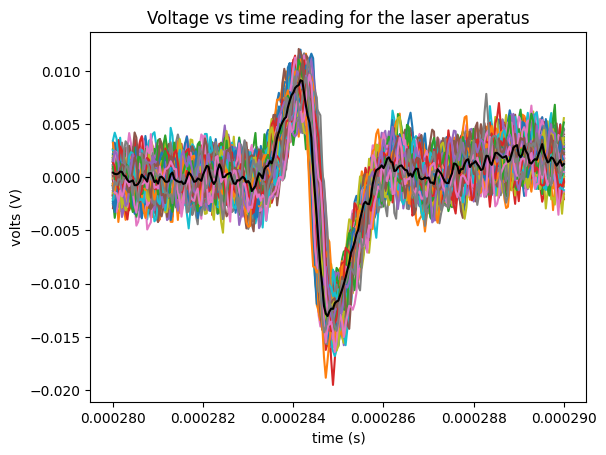

In [3]:
laser.apply("detrend", mode = "linear", inplace = True)
laser.apply("calibrate", cal = -1, inplace = True)
fig, ax = plt.subplots(1, 1)

for s in laser.collection[2:]:
    run = s
    run.plot(tmin = 2.8e-4, tmax = 2.9e-4, ax = ax)

laser.aggrigate(collection_slice = slice(2, 11, 1))
laser.agg.plot(tmin = 2.8e-4, tmax = 2.9e-4, ax = ax, c = "k")
#cut data at index 7050 for beginning of pulse signal

plt.title("Voltage vs time reading for the laser aperatus")
plt.xlabel("time (s)")
plt.ylabel("volts (V)")
plt.show()

Now for the microphone:

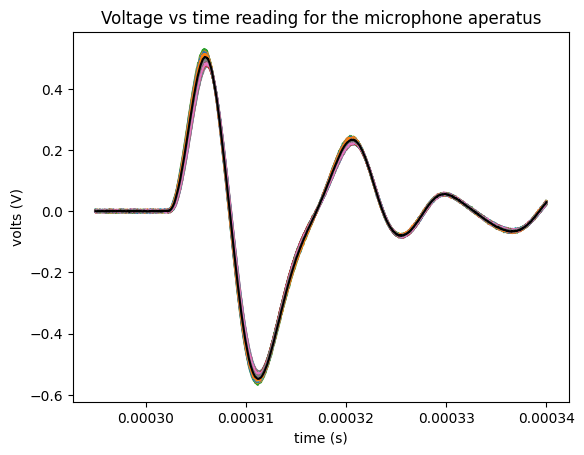

In [4]:
micro.apply("detrend", mode = "constant", inplace = True)

fig, ax = plt.subplots(1, 1)

for s in micro.collection[2:]:
    run = s
    run.plot(tmin = 2.95e-4, tmax = 3.4e-4, ax = ax)

micro.aggrigate(collection_slice = slice(2, 11, 1))
micro.agg.plot(tmin = 2.95e-4, tmax = 3.4e-4, ax = ax, c = "k")
    
plt.title("Voltage vs time reading for the microphone aperatus")
plt.xlabel("time (s)")
plt.ylabel("volts (V)")
plt.show()

Interestingly enough, the scale of the amplitude voltage recorded on the microphone in this first set of sample data is over four times as large as the one seen in the data recorded on the 11th of May. This is very pecuiliar considering that the laser data is a factor of one half of the data seen on that same date. 

Because of this, I'm now going to shift my focus. We've collected a new set of data on the 16th of May. It's initiated below

In [5]:
data = ["data/20230516/ene_scan_laserX_microphoneY/iter_" + str(i) + ".tdms" for i in range(6)]

Now we need to iterate through each of our six data sets (scaling with the same joules as described at the beginning). I'll set up a for loop and create graphs to represent each of the runs below:

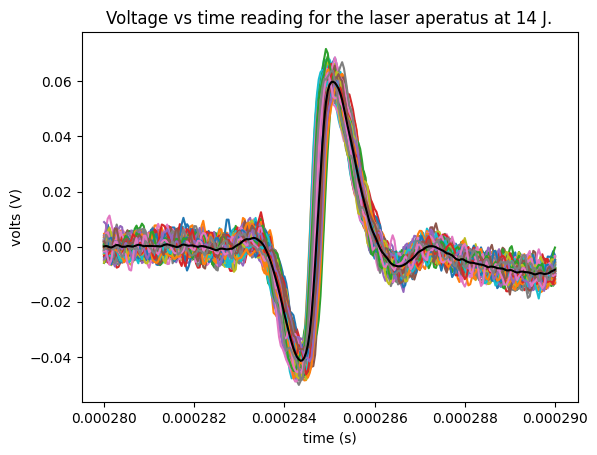

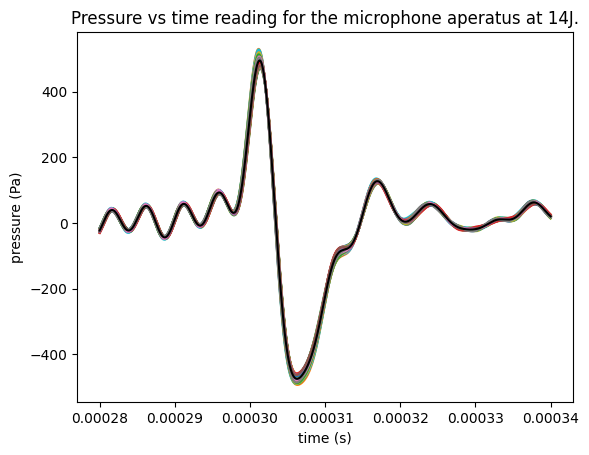

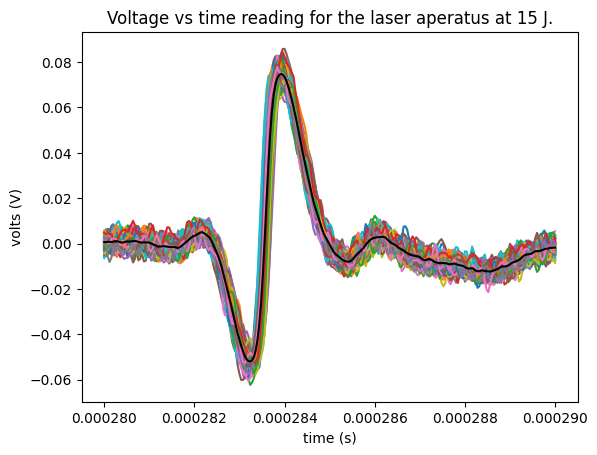

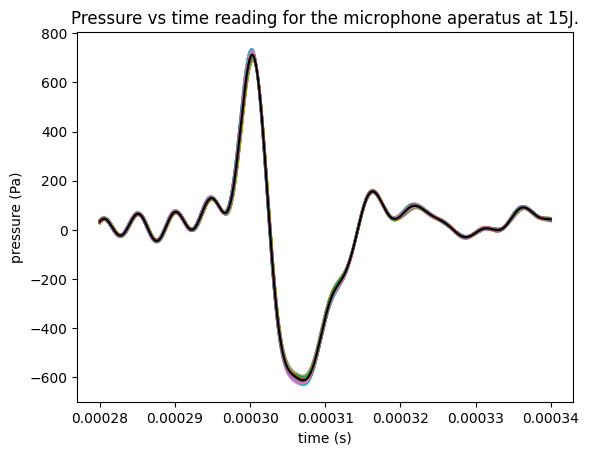

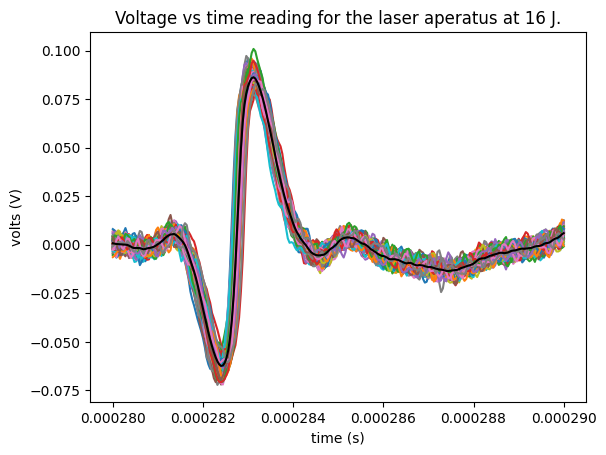

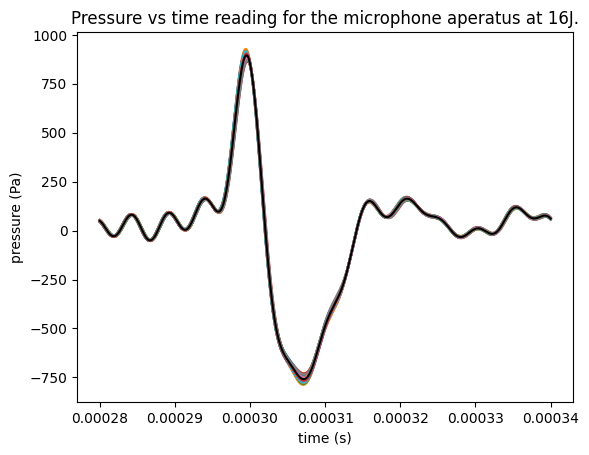

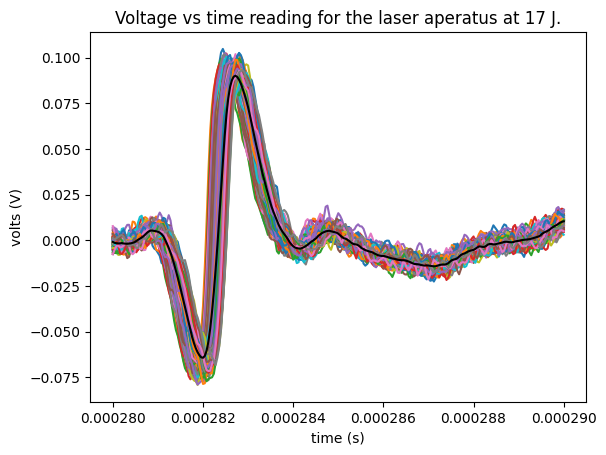

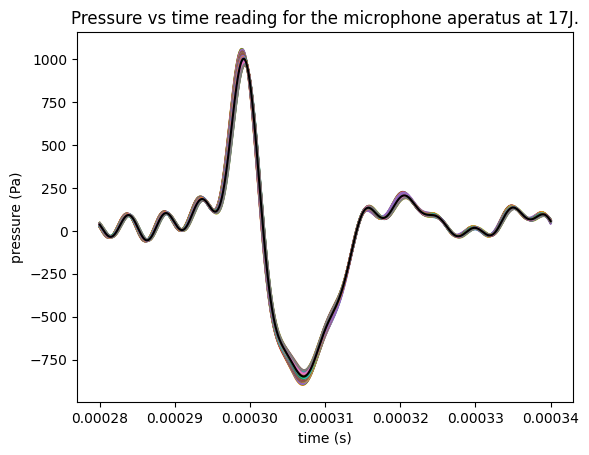

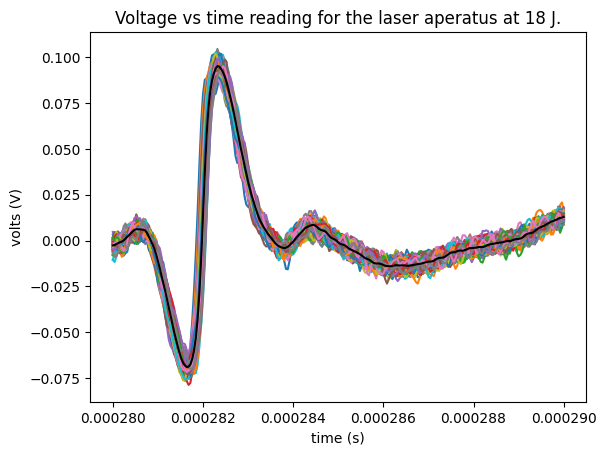

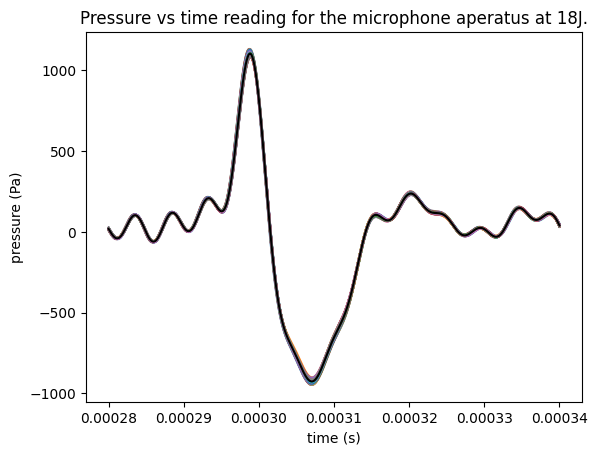

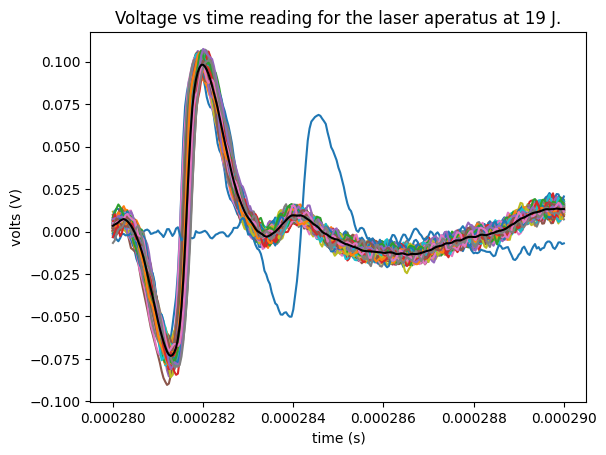

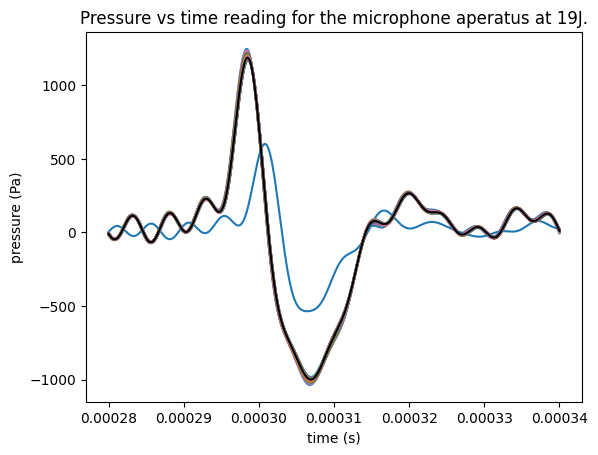

In [8]:
for i in range(len(data)):
    laser = ctdms(data[i])
    laser.set_collection("X")
    micro = ctdms(data[i])
    micro.set_collection("Y")
    
    laser.apply("detrend", mode = "linear", inplace = True)
    laser.apply("time_gate", tmin = 2.8e-4, tmax = None)
    micro.apply("detrend", mode = "linear", inplace = True)
    micro.apply("time_gate", tmin = 2.8e-4, tmax = None)
    micro.apply("correct", response = mic_response, recollect = True)
    fig, ax = plt.subplots(1, 1)

    for s in laser.collection[2:]:
        s.plot(tmin = 2.8e-4, tmax = 2.9e-4, ax = ax)

    laser.aggrigate(collection_slice = slice(2, len(laser.collection), 1))
    laser.agg.plot(tmin = 2.8e-4, tmax = 2.9e-4, ax = ax, c = "k")

    plt.title("Voltage vs time reading for the laser aperatus at " + str(14 + i) + " J.")
    plt.xlabel("time (s)")
    plt.ylabel("volts (V)")
    plt.show()
    
    fig, ax = plt.subplots(1, 1)

    for s in micro.collection[2:]:
        s.plot(tmin = 2.8e-4, tmax = 3.4e-4, ax = ax)

    micro.aggrigate(collection_slice = slice(2, len(micro.collection), 1))
    micro.agg.plot(tmin = 2.8e-4, tmax = 3.4e-4, ax = ax, c = "k")

    plt.title("Pressure vs time reading for the microphone aperatus at " + str(14 + i) + "J.")
    plt.xlabel("time (s)")
    plt.ylabel("pressure (Pa)")
    plt.show()
    
    # fft_L_avg = 0
    # fft_M_avg = 0
    # h = 0
    # for shotl, shotm in zip(laser.collection[2:], micro.collection[2:]):
    #     x_l = shotl.x[1:]
    #     r_l = shotl.r
    #     x_m = shotm.x[1:]
    #     r_m = shotm.r
    #     h += (rfft(x_l) / rfft(x_m)) / len(laser.collection)
    #     fft_L_avg += (rfft(x_l) / len(laser.collection))
    #     fft_M_avg += (rfft(x_m) / len(micro.collection))
    # freq_l = rfftfreq(len(x_l), 1 / r_l)
    # freq_m = rfftfreq(len(x_m), 1 / r_m)
    
    # fig, ax = plt.subplots(1, 1)
    # plt.loglog(freq_l[1:], np.abs(fft_L_avg[1:]), c = "k")
    # plt.loglog(freq_l[1:], np.abs(h_avg[1:]))
    # plt.plot(freq_m[1:], np.abs(fft_M_avg[1:]), c = "r")
    # plt.xlim([1e3, 2e5])
    # plt.show()
    # h_avg = fft_L_avg / fft_M_avg
    # def fit_func(f, a, b, c, d):
    #     return a * (f ** 4) + b * (f ** 3) + c * (f ** 2) + d * f
    # popt, pcov = curve_fit(fit_func, freq_l[1:], np.abs(h_avg[1:]))
    # plt.loglog(freq_l[1:], fit_func(freq_l[1:], popt[0], popt[1], popt[2], popt[3]))
    # plt.show()
    # print(pcov, "\n")

I've commented out a lot of code where we tried to calculate the transfer function (H), and graphed its fit plot. It ended up not being what we were really looking for. It seems that we'll need a better theoretical and mathematical model before our transfer function can really come to fruition.

I'd like to take a moment to calculate the RMS of our noise data before the impulse we measured and to create a signal to noise ratio graph.

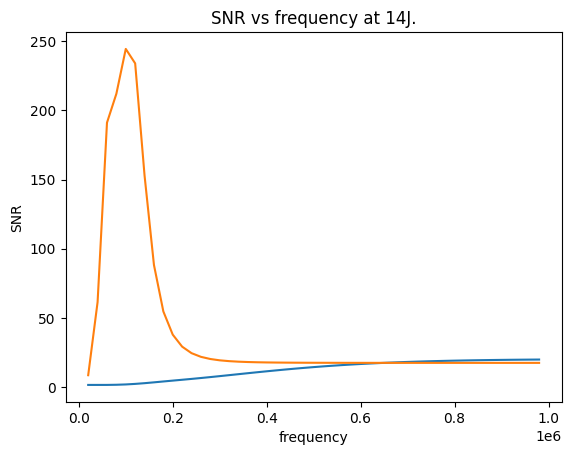

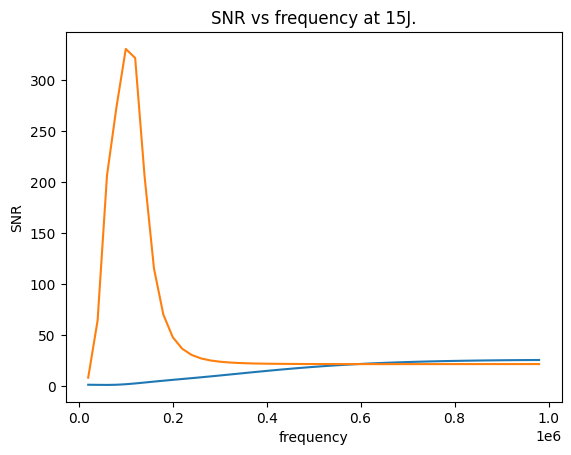

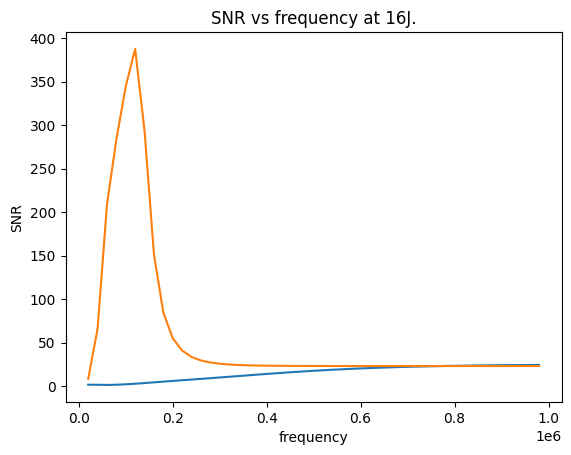

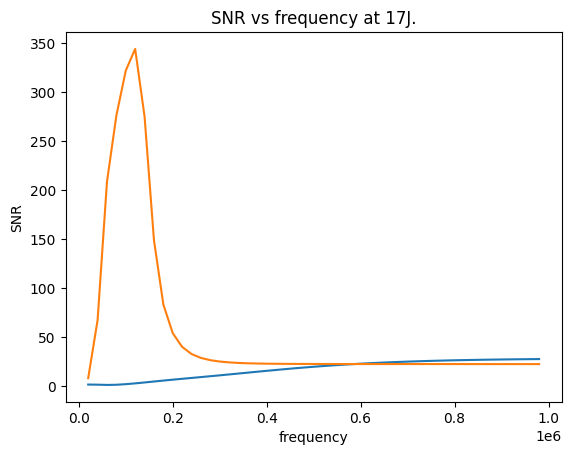

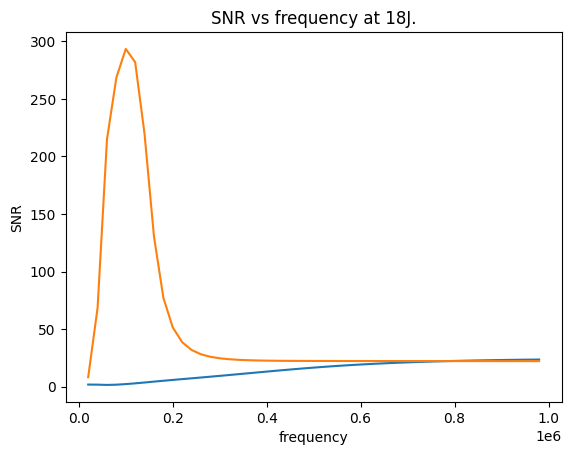

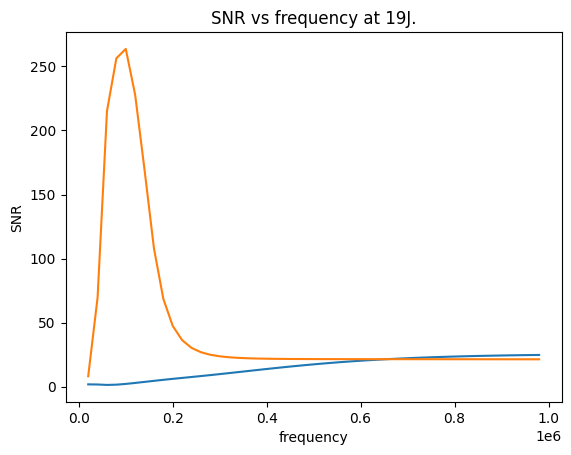

In [7]:
for i in range(len(data)):
    laser = ctdms(data[i])
    micro = ctdms(data[i])
    laser.set_collection("X")
    micro.set_collection("Y")
    snr_l = []
    snr_m = []
    sdev_l = []
    fc = [i for i in range(20000, 1000000, 20000)]
    for freq in fc:
        laser_peak_voltages = []
        micro_peak_voltages = []
        laser_rms = []
        micro_rms = []
        
        laser.apply("detrend", mode = "linear", inplace = True)
        laser.apply("lowpass", cutoff = freq, inplace = True)
        micro.apply("detrend", mode = "linear", inplace = True)
        micro.apply("lowpass", cutoff = freq, inplace = True)
        micro.apply("correct", response = mic_response, recollect = True)
        
        for shot_laser, shot_micro in zip(laser.collection[2:72], micro.collection[2:72]):
            laser_peak_voltages.append(max(shot_laser.x[:7200]))
            laser_rms.append(np.sqrt(np.mean(shot_laser.x[:7000] ** 2)))
            micro_peak_voltages.append(max(shot_micro.x[:8000]))
            micro_rms.append(np.sqrt(np.mean(shot_micro.x[:7000] ** 2)))
        for shot_laser, shot_micro in zip(laser.collection[73:], micro.collection[73:]):
            laser_peak_voltages.append(max(shot_laser.x[:7200]))
            laser_rms.append(np.sqrt(np.mean(shot_laser.x[:7000] ** 2)))
            micro_peak_voltages.append(max(shot_micro.x[:8000]))
            micro_rms.append(np.sqrt(np.mean(shot_micro.x[:7000] ** 2)))
        snr_l.append(np.mean(np.array(laser_peak_voltages) / np.array(laser_rms)))
        snr_m.append(np.mean(np.array(micro_peak_voltages) / np.array(micro_rms)))
        # snr_l.append(np.mean(laser_peak_voltages) / np.mean(laser_rms))
        # snr_m.append((np.mean(micro_peak_voltages) / np.mean(micro_rms)))
        laser.set_collection("X")
        micro.set_collection("Y")
    # ld_rms = [np.sqrt(np.mean(laser.collection[0].x[:j] ** 2)) for j in range(1, 7000)]
    plt.plot(fc, snr_l)
    plt.plot(fc, snr_m)
    plt.title("SNR vs frequency at " + str(14 + i) + "J.")
    plt.xlabel("frequency")
    plt.ylabel("SNR")
    plt.show()